<div style="border:solid black 2px; padding: 20px">
    
# SQL — цели, описание данных


**Объект анализа**: база данных крупного сервиса для чтения книг по подписке.

**Цель исследования**: проведение анализа базы данных, с информацией о книгах, издательствах, авторах, а также пользовательские обзоров книг. Эти данные помогут сформулировать ценностное предложение для нового продукта. 

**Ход исследования** : 
    
1. Посчитать, сколько книг вышло после 1 января 2000 года;
2. Для каждой книги посчитать количество обзоров и среднюю оценку;
3. Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — с целью исключения из анализа брошюр;
4. Определить автора с самой высокой средней оценкой книг (только книги с 50 и более оценками);
5. Посчитать среднее количество обзоров от пользователей, которые поставили больше 50 оценок.
    

<div style="border:solid black 2px; padding: 20px">
    
**Схема базы данных**    
    
    
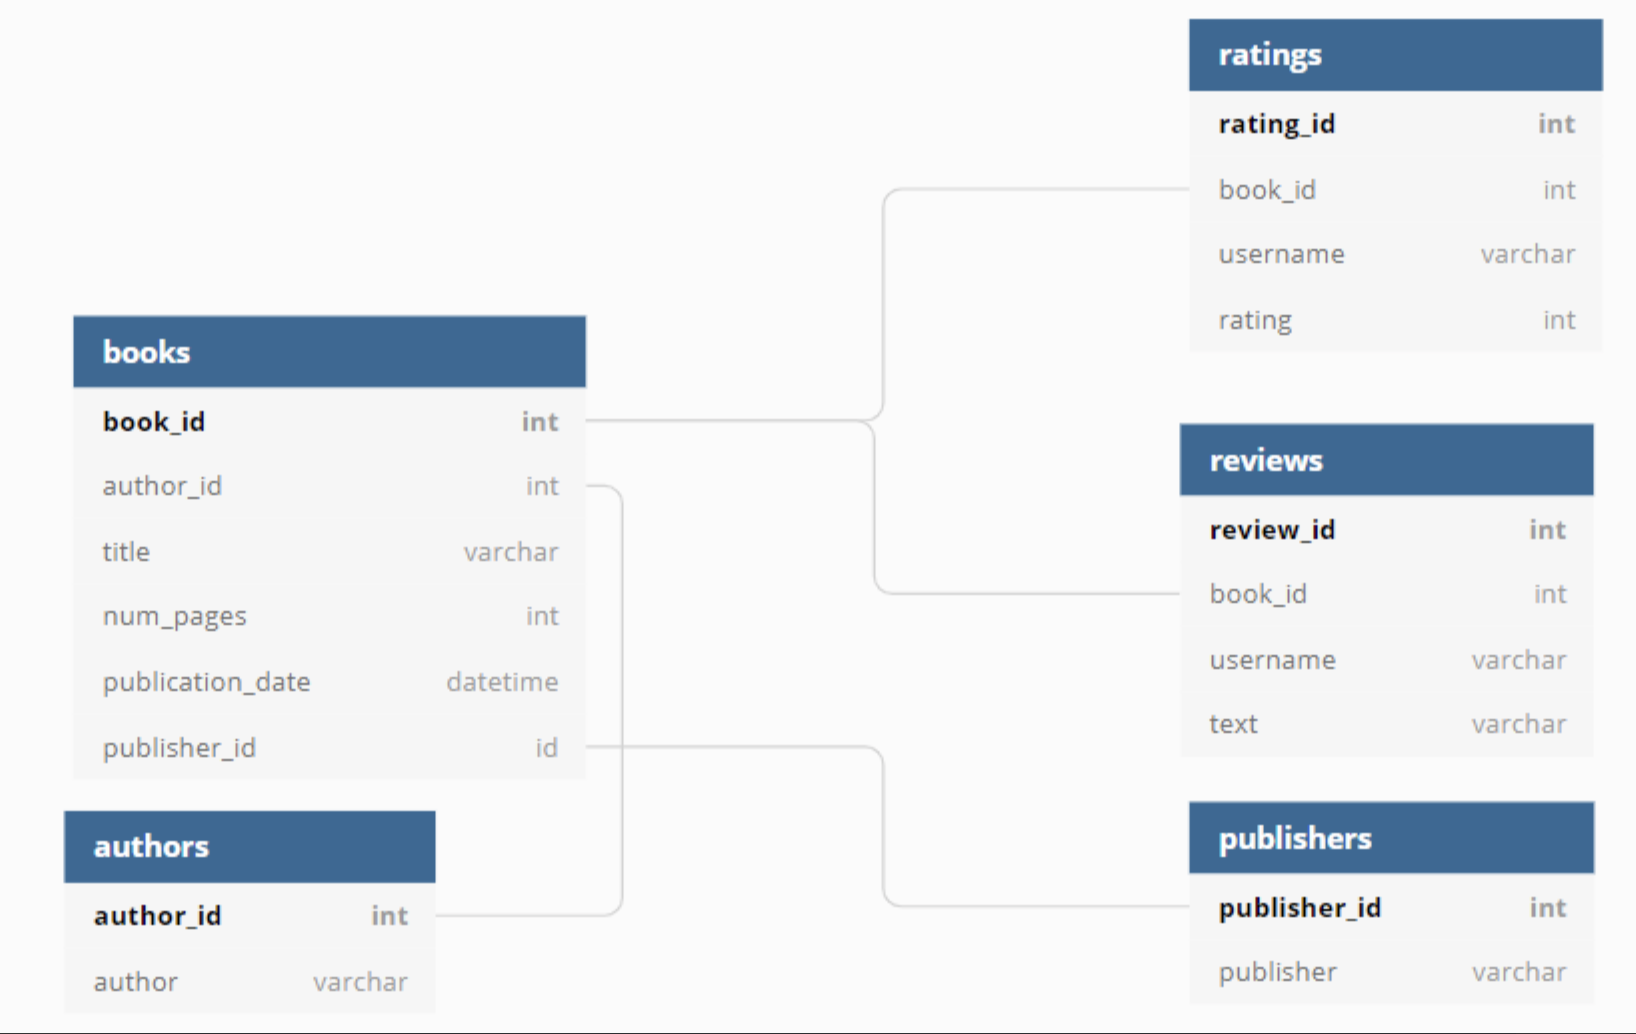

# Изучение данных.

## Импорт библиотек

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

## Подключение к базе данных

In [2]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'], db_config['pwd'],
                                                         db_config['host'], db_config['port'],db_config['db']) 
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

In [3]:
# функция для чтения sql запосов
def read_sql(query):
    result = pd.io.sql.read_sql(query, con = engine)
    return result
    

## Таблица books

In [4]:
read_sql('''select * 
            from books 
            limit 5''')

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

In [5]:
read_sql('''select count(distinct book_id) as books_cnt,
            count (distinct author_id) as author_cnt,
            count (distinct publisher_id) as publisher_cnt,
            min(publication_date) as min_date,
            max (publication_date)as max_date,
            min(num_pages) as min_pages,
            max (num_pages) as max_pages
            from books ''')

,books_cnt,author_cnt,publisher_cnt,min_date,max_date,min_pages,max_pages
0,1000,636,340,1952-12-01,2020-03-31,14,2690


Всего в таблице представлены данные о 1000 книгах и 636 авторах этих книг.

Опубликованы в период с 01.12.1952 по 31.03.2020 , 340 разными издательствами.

Число страниц варьируется от 14 до 2690 страниц.

## Таблица authors

In [6]:
read_sql('''select * 
            from authors 
            limit 5''')

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

In [7]:
read_sql('''select count(distinct author_id )
            from authors ''')

,count
0,636


В таблице представлены данные о 636 авторах.

## Таблица ratings

In [8]:
read_sql('''select * 
            from ratings 
            limit 5''')

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

In [9]:
read_sql('''select count(distinct username )
            from ratings ''')

,count
0,160


160 пользователей высталяют оценки книгам.

## Таблица reviews

In [10]:
read_sql('''select * 
            from reviews 
            limit 5''')

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

In [11]:
read_sql('''select count( review_id) as sum_reviews,
            count(distinct username) as sum_username
            from reviews 
            ''')

,sum_reviews,sum_username
0,2793,160


Всего в таблице содержится 2793 обзора от 160 уникальных пользователей.

## Таблица publishers

In [12]:
read_sql('''select * 
         from publishers 
         limit 5''')

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

In [13]:
read_sql('''select count( publisher_id) as sum_publishers
            from publishers 
            ''')

,sum_publishers
0,340


В таблице представлены данные о 340 издательствах.

# Задания

## Количество книг,вышедших после 1 января 2000 года

In [14]:
read_sql('''select count(title)
            from books 
            where (cast (publication_date as date) > '2000-01-01')''')

,count
0,819


После 1 января 2000 года вышло 819 книг.

##  Количество обзоров и средняя оценка

In [15]:
read_sql('''select b.title ,
            count (distinct rv.review_id) as reviews,
            avg(rt.rating) as avg_rating
                      
            from books b
            
            left join reviews rv on rv.book_id = b.book_id
            left join ratings rt on rt.book_id = b.book_id
            group by b.book_id
            order by reviews desc
            ''')

,title,reviews,avg_rating
0,Twilight (Twilight #1),7,3.662500
1,Water for Elephants,6,3.977273
2,The Glass Castle,6,4.206897
3,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.414634
4,The Curious Incident of the Dog in the Night-Time,6,4.081081
...,...,...,...
995,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.666667
996,The Natural Way to Draw,0,3.000000
997,The Cat in the Hat and Other Dr. Seuss Favorites,0,5.000000
998,Essential Tales and Poems,0,4.000000


В вышепредставленной таблице был проведен расчет количества обзоров и средних оценок книг. Таблица состоит из 1000 строк. Больше всего обзоров у книг Twilight (Twilight #1) со средней оценкой 3.66.

## Издательство, которое выпустило наибольшее число книг толще 50 страниц — с целью исключения из анализа брошюр

In [16]:
read_sql('''select p.publisher,
            count(b.book_id) as books
            from publishers p
            
            left join books b on p.publisher_id = b.publisher_id
            where b.num_pages > 50
            group by p.publisher
            order by books desc
            limit 5
            ''')

,publisher,books
0,Penguin Books,42
1,Vintage,31
2,Grand Central Publishing,25
3,Penguin Classics,24
4,Bantam,19


Издательство Penguin Books выпустило наибольшее количество книг толще 50 страниц.

## Определить автора с самой высокой средней оценкой книг (только книги с 50 и более оценками)

In [17]:
read_sql('''with rating_count as (
            select book_id,
            count(rating_id) as ratings,
            avg (rating) as avg_rating
            from ratings 
            group by book_id)

            select a.author,
            avg(rc.avg_rating) as avg_rate
            
            from authors a
            
            left join books b on a.author_id = b.author_id
            left join rating_count rc on rc.book_id = b.book_id
            where rc.ratings > 50
            group by a.author
            order by avg_rate desc
            limit 5
            ''')

,author,avg_rate
0,J.K. Rowling/Mary GrandPré,4.283844
1,Markus Zusak/Cao Xuân Việt Khương,4.264151
2,J.R.R. Tolkien,4.258446
3,Louisa May Alcott,4.192308
4,Rick Riordan,4.080645


Самая высокая средняя оценка книг (4.28) у автора J.K. Rowling/Mary GrandPré.

Также достаточно высокие оценки получили Markus Zusak (4.26) и J.R.R. Tolkien(4.25).

## Cреднее количество обзоров от пользователей, которые поставили больше 50 оценок.

In [18]:
read_sql('''with rate_count as
                    (select username,
                     count(rating_id) as ratings
                     from ratings
                     group by username),
                     
            reviews_count as 
                     (select r.username, count(r.review_id) as rewiews
                     from reviews r
                     join rate_count rc on rc.username = r.username
                     where rc.ratings >50
                     group by r.username)
                     
             select avg(rewiews)
             from reviews_count ''')

,avg
0,24.333333


В среднем, пользователи, которые поставили больше 50 оценок, написали 24 обзора каждый.  